In [2]:
# 1. Import Required Libraries
import os
import numpy as np
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt


In [3]:
# 2. Define Paths
processed_data_dir = '../data/processed/'
model_path = '../model/model.h5'
label_map_path = '../model/label_map.json'


In [4]:
# 3. Load and Preprocess Images
img_size = (128, 128)
X = []
y = []
labels = sorted(os.listdir(processed_data_dir))
label_map = {label: idx for idx, label in enumerate(labels)}

for label in labels:
    label_dir = os.path.join(processed_data_dir, label)
    for img_file in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_file)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            X.append(img_array)
            y.append(label_map[label])
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

X = np.array(X)
y = to_categorical(y)


In [5]:
# 4. Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 5. Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=img_size + (3,)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\creat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 6. Train the Model
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(model_path, save_best_only=True)
]

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20,
                    batch_size=32,
                    callbacks=callbacks)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.2571 - loss: 2.7728

64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - accuracy: 0.2578 - loss: 2.7600 - val_accuracy: 0.3972 - val_loss: 1.4470
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.3872 - loss: 1.4573 - val_accuracy: 0.4387 - val_loss: 1.4860
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.4786 - loss: 1.2804

64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.4788 - loss: 1.2802 - val_accuracy: 0.5395 - val_loss: 1.2484
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.5739 - loss: 1.1289 - val_accuracy: 0.4921 - val_loss: 1.2587
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6164 - loss: 1.0114

64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.6168 - loss: 1.0107 - val_accuracy: 0.5375 - val_loss: 1.2286
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.6625 - loss: 0.8467 - val_accuracy: 0.5138 - val_loss: 1.2344
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7252 - loss: 0.7100 - val_accuracy: 0.5573 - val_loss: 1.3023
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7801 - loss: 0.6248 - val_accuracy: 0.5731 - val_loss: 1.3429
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.8462 - loss: 0.4646 - val_accuracy: 0.5613 - val_loss: 1.4714
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.8705 - loss: 0.3806 - val_accuracy: 0.5850 - val_loss: 1.4659


In [8]:
# 7. Save Label Map
with open(label_map_path, 'w') as f:
    json.dump(label_map, f)


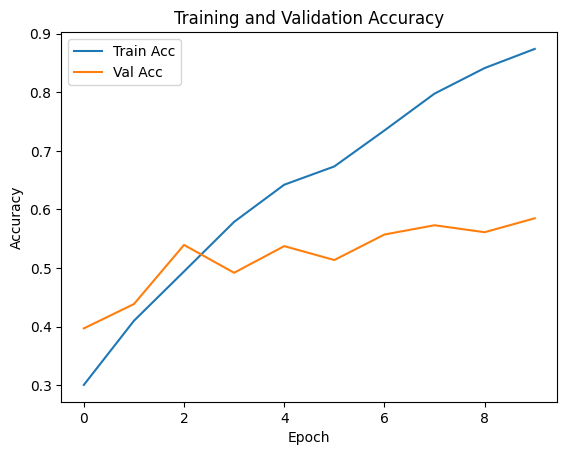

In [9]:
# 8. Plot Training Results
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
